<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Data-Mining/blob/main/DataCleaningColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#              **Data Cleaning of Hotel Booking Dataset** 

---





**Import all the relevant libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as py
import plotly.graph_objects as graph

**I Have imported Dataset from github**

In [23]:
# Read the dataset from github
dataset_path = "https://github.com/Karishma-Kuria/CMPE-255-Data-Mining/blob/main/DataCleaningColabAssignment/hotel_bookings.csv?raw=true"
hotel_booking = pd.read_csv(dataset_path)
bookings_dataset = hotel_booking.copy()

# Prints top 10 rows of dataset
hotel_booking.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [24]:
# Prints the dimentions of dataset
bookings_dataset.shape

(119390, 32)

In [25]:
# Checking top 10 rows of the dataset
bookings_dataset.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [26]:
bookings_dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [27]:
# Checking for the data type of all the columns
bookings_dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

From the above data type description of the data set I observed below things:


1.   reservation_status_date should be a datetime  variable
2.   children should be int64



**Check Duplicates and Remove duplicate**

In [28]:
sum(bookings_dataset.duplicated())

31994

In [29]:
# Removed Duplicates
bookings_dataset.drop_duplicates(inplace=True)
bookings_dataset.shape

(87396, 32)

In [30]:
# Checking the info of the dataset
bookings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

From the above info, I got to know that, there is missing data in the below columns:


1.   children
2.   country
3.   agent
4.   company




In [31]:
# Now I checked how many missing values are there in these columns
bookings_dataset.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [32]:
# Now I have converted reservation_status_date to datetime data type
bookings_dataset['reservation_status_date'] = pd.to_datetime(bookings_dataset['reservation_status_date'])


In [33]:
# Check datatpe of 'reservation_status_date'
bookings_dataset.dtypes['reservation_status_date']
bookings_dataset.dtypes


hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

# **Visualization**

In [34]:
# Percentage of guests in Both the hotels
city_hotel,resort_hotel = bookings_dataset['hotel'].value_counts().values.tolist()
figure = graph.Figure(data=[graph.Pie(labels = ['City Hotel','Resort Hotel'],values=[city_hotel,resort_hotel],hole=.3)])
figure.update_traces(hoverinfo='label+percent', textinfo='value')
figure.show()

The Above graph shows that Resort Hotel recieves more guests.

Which Month recieves more guests?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



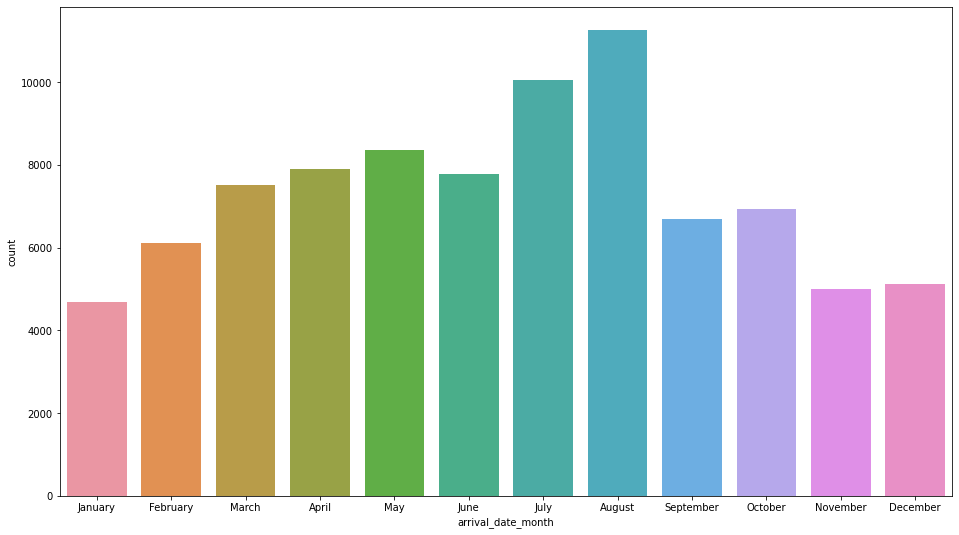

In [35]:
# To find the bussiest month, I have plotted the below graph using seaborn
plt.figure(figsize=(16,9))
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(bookings_dataset['arrival_date_month'], order= month)
plt.show()



# **Filling Missing Values**

Filling the missing values:

1. Children: I have used mean and since its of float type I am rounding of to the lowest integer.
2. Agent and Company: I have filled the missing values with 0.



In [36]:
bookings_dataset['children'].fillna(value=bookings_dataset['children'].mean(), inplace=True)
bookings_dataset['children'] = bookings_dataset['children'].apply(np.floor) 
bookings_dataset['agent'] = bookings_dataset['agent'].fillna(0)
bookings_dataset['company'] = bookings_dataset['company'].fillna(0)
bookings_dataset['country'] = bookings_dataset['country'].fillna('OTHERS')
print(f"Missing values in column children and agent: {np.sum(bookings_dataset['children'].isnull())}, {np.sum(bookings_dataset['agent'].isnull())}")
print(f"Missing values in column 'company': {np.sum(bookings_dataset['company'].isnull())}")

Missing values in column children and agent: 0, 0
Missing values in column 'company': 0


# **Remove unwanted columns:**

1.   Looking at the data set, I realised that 'children' and 'babies' column can be combined to a new column 'kids'.
2.   Also 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' can be combined single column 'arrival_date' which will be a datetime attribute.




In [37]:
# Combined the below columns
bookings_dataset['kids'] = bookings_dataset['children'] + bookings_dataset['babies']
bookings_dataset['kids'] = bookings_dataset['kids'].astype(int)
bookings_dataset['arrival_date'] = pd.to_datetime(bookings_dataset['arrival_date_month'].astype(str) + '/'
+ bookings_dataset['arrival_date_day_of_month'].astype(str) + '/' + bookings_dataset['arrival_date_year'].astype(str))
bookings_dataset.shape

(87396, 34)

In [38]:
# Checked the data type of the newly created column
bookings_dataset['arrival_date'][0]

Timestamp('2015-07-01 00:00:00')

In [39]:
# Removed below columns

bookings_dataset.drop(columns=['children','babies','arrival_date_week_number','arrival_date_day_of_month', 'arrival_date_month','arrival_date_year'], inplace = True, axis=1)


In [40]:
# Checked the dimentions of the dataset
bookings_dataset.shape

(87396, 28)

In [41]:
# Checked for missing values after filling all the missing values
bookings_dataset.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
kids                              0
arrival_date                

**Modelling**

Based on the columns provided and the amount of cancelation, I have designed a model to predict cancelation using the below categorical and numerical columns.

**Categorize the numerical and categorical column to be used for the model.**

In [42]:
# Here I have found the list of categorical and continous features
categorical_features = []
continous_features = []

for i in bookings_dataset.columns:
   if bookings_dataset[i].dtypes != 'object':
    continous_features.append(i)
   else:
     categorical_features.append(i)
print(" Categorical Features are:\n",categorical_features)

 Categorical Features are:
 ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [43]:
# Here I have selected few of the important continous and categorical features to reduce the complexity of model,

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

continous_features = ["lead_time",
                "stays_in_weekend_nights","stays_in_week_nights","adults",
                "is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

categorical_features = ["hotel","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

total_features = categorical_features + continous_features
print(total_features)

# Now I have seperated the predicted values and the total features
a = bookings_dataset.drop(["is_canceled"], axis=1)[total_features]
b = bookings_dataset["is_canceled"]

# Preprocessing continous data
# Since for most of the numerical column 0 seems to be the null value,so using this constant.
continous_features_tranform = SimpleImputer(strategy="constant")

# Preprocessing categorical data
from sklearn.pipeline import Pipeline
categorical_features_transform = Pipeline(steps=[
      ("imputer",SimpleImputer(strategy="constant",fill_value="Unknown")),
      ("onehot",OneHotEncoder(handle_unknown="ignore"))])
# Combined preprocessing for both categories of features
pre_processor = ColumnTransformer(transformers=[
          ("cont", continous_features_tranform, continous_features),
          ("cat", categorical_features_transform, categorical_features)])

['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'company', 'required_car_parking_spaces', 'total_of_special_requests', 'adr']


Since I have already delt with the missing values, so no preprocessing is required at this point.


**Defined the model for testing**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score

models = [("DTC_model", DecisionTreeClassifier(random_state=42)),
          ("RFC_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
          ("LR_model", LogisticRegression(random_state=42,n_jobs=-1))]

# Now I have divided the data for validation purpose and I have used random 
# to make sure the data is distributed randomly

split_percentage = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits = split_percentage, shuffle=True, random_state=42)

**Evaluate and Predict Models**

In [45]:
for name, model in models:
   # Packed model and preprocessing of data in pipeline
   model_steps = Pipeline(steps=[("preprocessing", pre_processor),
                                 ("model", model)])
   crossval_resuls = cross_val_score(model_steps,a,b,cv=split,scoring="accuracy",n_jobs=-1)

   # Output Values
   min_score_value = round(min(crossval_resuls),4)
   max_score_value = round(max(crossval_resuls),4)
   mean_score_value = round(np.mean(crossval_resuls),4)
   std_dv_value = round(np.std(crossval_resuls),4)

   print(f"For {name} model Mean score is: {mean_score_value}\n Std Dev value is: {std_dv_value}\n Max score is: {max_score_value} \n min score is: {min_score_value}")


For DTC_model model Mean score is: 0.7487
 Std Dev value is: 0.0036
 Max score is: 0.7513 
 min score is: 0.7426
For RFC_model model Mean score is: 0.8026
 Std Dev value is: 0.0018
 Max score is: 0.8051 
 min score is: 0.8001
For LR_model model Mean score is: 0.7791
 Std Dev value is: 0.004
 Max score is: 0.7848 
 min score is: 0.7735
